In [1]:
import torch

In [17]:
import cv2
from ultralytics import YOLO
model = YOLO("/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/model/runs/pose/yolov8n_keypoints2/weights/best.pt")
device = torch.device("cuda")
model.to(device)
image_path = "/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/Augmentations/image/flipped_horizontal_frame_0041.jpg"
lmg_results = model.predict(image_path)

cv2.imwrite("result.jpg",lmg_results[0].plot())


image 1/1 /home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/Augmentations/image/flipped_horizontal_frame_0041.jpg: 384x640 1 LMG, 192.2ms
Speed: 4.7ms preprocess, 192.2ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


True

In [18]:
lmg_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'LMG'}
 obb: None
 orig_img: array([[[230, 193, 165],
         [230, 193, 165],
         [227, 192, 166],
         ...,
         [ 93, 114, 111],
         [ 92, 114, 109],
         [ 65,  87,  82]],
 
        [[230, 193, 165],
         [231, 194, 166],
         [228, 193, 167],
         ...,
         [ 63,  84,  81],
         [ 61,  83,  78],
         [ 72,  94,  89]],
 
        [[236, 199, 173],
         [237, 200, 174],
         [237, 200, 174],
         ...,
         [ 53,  74,  71],
         [ 59,  81,  76],
         [ 82, 104,  99]],
 
        ...,
 
        [[ 85, 121, 121],
         [100, 136, 136],
         [118, 154, 154],
         ...,
         [156, 125, 122],
         [156, 125, 122],
         [156, 125, 122]],
 
        [[ 97, 118, 119],
         [100, 121, 122],
         [110, 131, 13

In [19]:
lmg_results[0].boxes.conf[0]

tensor(0.9122, device='cuda:0')

In [6]:
numbers = [0.75, 0.85, 0.92, 0.67, 0.89]

max_number = max(numbers)  # Get the highest number
print(f"Maximum Number: {max_number:.2f}")

Maximum Number: 0.92


In [20]:
confidence_scores = []

for result in lmg_results:
    for box in result.boxes:
        confidence = float(box.conf[0])
        confidence_scores.append(confidence)

print("All Confidence Scores:", confidence_scores)


All Confidence Scores: [0.9122092723846436]


In [24]:
lmg_results[0].keypoints.xy[0]

tensor([[729.3993, 264.5960],
        [538.2008, 303.2654],
        [501.0468, 273.4219],
        [632.1858, 247.1472],
        [563.9689, 205.2193],
        [460.0045, 226.3470],
        [348.9335, 310.2598],
        [283.8467, 338.3907]], device='cuda:0')

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Your tensor with coordinates
tensor = torch.tensor([[[729.3993, 264.5960],
        [538.2008, 303.2654],
        [501.0468, 273.4219],
        [632.1858, 247.1472],
        [563.9689, 205.2193],
        [460.0045, 226.3470],
        [348.9335, 310.2598],
        [283.8467, 338.3907]]])

# Convert tensor to numpy
coordinates = tensor.squeeze().numpy()

# Label list
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

label_coordinates_dict = {labels[i]: tuple(coordinates[i]) for i in range(len(labels))}

# Load your image (Make sure to replace 'your_image.jpg' with the correct file path)
image = cv2.imread('result.jpg')

# Draw labels on the image
for i, point in enumerate(coordinates):
    x, y = int(point[0]), int(point[1])  # Ensure the points are integers
    cv2.putText(image, labels[i], (x + 10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Save or display the result
cv2.imwrite('label_output_image_with_labels.jpg', image)  # Save the output image
# cv2.imshow('Image with Labels', image)
# cv2.waitKey(0)  # Wait for a key press
# cv2.destroyAllWindows()  # Close the image window


True

{'A': (np.float32(729.3993), np.float32(264.596)), 'B': (np.float32(538.2008), np.float32(303.2654)), 'C': (np.float32(501.0468), np.float32(273.4219)), 'D': (np.float32(632.1858), np.float32(247.1472)), 'E': (np.float32(563.9689), np.float32(205.2193)), 'F': (np.float32(460.0045), np.float32(226.347)), 'G': (np.float32(348.9335), np.float32(310.2598)), 'H': (np.float32(283.8467), np.float32(338.3907))}


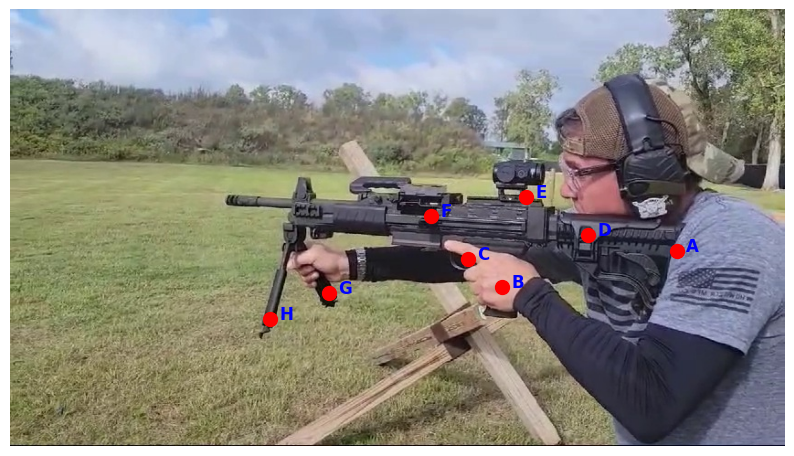

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

# Load your image
image_path = "/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/Augmentations/image/flipped_horizontal_frame_0041.jpg"  # Replace with the correct file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct matplotlib display

# Your tensor with coordinates
tensor = torch.tensor([[[729.3993, 264.5960],
        [538.2008, 303.2654],
        [501.0468, 273.4219],
        [632.1858, 247.1472],
        [563.9689, 205.2193],
        [460.0045, 226.3470],
        [348.9335, 310.2598],
        [283.8467, 338.3907]]])

# Convert tensor to numpy
coordinates = tensor.squeeze().numpy()

# Label list
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

label_coordinates_dict = {labels[i]: tuple(coordinates[i]) for i in range(len(labels))}

print(label_coordinates_dict)
# Plot the image as background
plt.figure(figsize=(10, 8))
plt.imshow(image)

# Overlay the points on the image
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red', s=100, label='Points')

# Add labels to each point
for i, (x, y) in enumerate(coordinates):
    plt.text(x + 10, y, labels[i], fontsize=12, color='blue', weight='bold')

# Hide axes (optional)
plt.axis("off")

# Show the final result
plt.show()


In [27]:
lmg_results[0].keypoints.xy

tensor([[[729.3993, 264.5960],
         [538.2008, 303.2654],
         [501.0468, 273.4219],
         [632.1858, 247.1472],
         [563.9689, 205.2193],
         [460.0045, 226.3470],
         [348.9335, 310.2598],
         [283.8467, 338.3907]]], device='cuda:0')

In [13]:

lmg_results[0].keypoints.xy[0][1]

tensor([446.2247, 416.5957], device='cuda:0')

# Pose Model

In [16]:
pose_model=YOLO("yolov8m-pose.pt")
device = torch.device("cpu")

# Move the model to CPU
model.to(device)
pose_result=pose_model.predict("/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/Augmentations/image/flipped_horizontal_frame_0041.jpg")
ploting_pose=pose_result[0].plot()
cv2.imwrite("pose estiation.jpg",ploting_pose)


image 1/1 /home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/Augmentations/image/flipped_horizontal_frame_0041.jpg: 384x640 1 person, 179.6ms
Speed: 5.5ms preprocess, 179.6ms inference, 19.6ms postprocess per image at shape (1, 3, 384, 640)


True

In [28]:
pose_result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[230, 193, 165],
         [230, 193, 165],
         [227, 192, 166],
         ...,
         [ 93, 114, 111],
         [ 92, 114, 109],
         [ 65,  87,  82]],
 
        [[230, 193, 165],
         [231, 194, 166],
         [228, 193, 167],
         ...,
         [ 63,  84,  81],
         [ 61,  83,  78],
         [ 72,  94,  89]],
 
        [[236, 199, 173],
         [237, 200, 174],
         [237, 200, 174],
         ...,
         [ 53,  74,  71],
         [ 59,  81,  76],
         [ 82, 104,  99]],
 
        ...,
 
        [[ 85, 121, 121],
         [100, 136, 136],
         [118, 154, 154],
         ...,
         [156, 125, 122],
         [156, 125, 122],
         [156, 125, 122]],
 
        [[ 97, 118, 119],
         [100, 121, 122],
         [110, 131,

In [29]:
pose_result[0].keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9526, 0.9434, 0.4350, 0.8807, 0.0242, 0.9373, 0.8781, 0.8778, 0.7577, 0.9418, 0.8337, 0.1621, 0.1688, 0.0239, 0.0194, 0.0081, 0.0066]], device='cuda:0')
data: tensor([[[6.1036e+02, 1.9690e+02, 9.5259e-01],
         [6.2512e+02, 1.7731e+02, 9.4344e-01],
         [0.0000e+00, 0.0000e+00, 4.3501e-01],
         [6.9514e+02, 1.7455e+02, 8.8073e-01],
         [0.0000e+00, 0.0000e+00, 2.4186e-02],
         [7.8059e+02, 2.5300e+02, 9.3733e-01],
         [6.6965e+02, 2.3211e+02, 8.7811e-01],
         [7.0770e+02, 4.2448e+02, 8.7783e-01],
         [5.4710e+02, 2.9609e+02, 7.5769e-01],
         [5.7515e+02, 3.1414e+02, 9.4180e-01],
         [3.8106e+02, 2.7040e+02, 8.3372e-01],
         [0.0000e+00, 0.0000e+00, 1.6210e-01],
         [0.0000e+00, 0.0000e+00, 1.6876e-01],
         [0.0000e+00, 0.0000e+00, 2.3865e-02],
         [0.0000e+00, 0.0000e+00, 1.9438e-02],
         [0.0000e+00, 0.0000e+00, 8.0513e-03],
         [

In [30]:
a= [person.xy.cpu().numpy().squeeze() for person in pose_result[0].keypoints]
len(a)

1

In [32]:
pose_result[0].keypoints.xy[0]

tensor([[610.3599, 196.8976],
        [625.1180, 177.3091],
        [  0.0000,   0.0000],
        [695.1409, 174.5511],
        [  0.0000,   0.0000],
        [780.5858, 253.0017],
        [669.6547, 232.1121],
        [707.6994, 424.4788],
        [547.0964, 296.0884],
        [575.1497, 314.1358],
        [381.0597, 270.3994],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]], device='cuda:0')

array([[          0,           0],
       [          0,           0],
       [          0,           0],
       [          0,           0],
       [          0,           0],
       [     769.09,      5.9995],
       [     650.67,      8.4334],
       [     796.18,      57.476],
       [     622.14,      60.852],
       [     789.31,      130.57],
       [     617.01,      129.91],
       [     752.23,      124.28],
       [     673.39,      125.43],
       [     760.91,       249.1],
       [      679.8,      245.43],
       [     769.55,       361.1],
       [     688.53,      355.33]], dtype=float32)

In [33]:
import cv2
import numpy as np
import torch
import string

# Your tensor with coordinates
tensor = torch.tensor([[610.3599, 196.8976],
        [625.1180, 177.3091],
        [  0.0000,   0.0000],
        [695.1409, 174.5511],
        [  0.0000,   0.0000],
        [780.5858, 253.0017],
        [669.6547, 232.1121],
        [707.6994, 424.4788],
        [547.0964, 296.0884],
        [575.1497, 314.1358],
        [381.0597, 270.3994],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])

# Convert tensor to numpy
coordinates = tensor.numpy()

# Label list (A, B, C, ...)
labels = [
    "nose", "left_eye", "right_eye", "left_ear", "right_ear",
    "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
    "left_wrist", "right_wrist", "left_hip", "right_hip",
    "left_knee", "right_knee", "left_ankle", "right_ankle"
]

label_coordinates_dict = {
    labels[i]: tuple(coordinates[i]) 
    for i in range(len(labels)) if not np.array_equal(coordinates[i], [0.0, 0.0])
}

# Print the dictionary
print(label_coordinates_dict)

# Load your image (Make sure to replace 'your_image.jpg' with the correct file path)
image = cv2.imread('pose estiation.jpg')

# Draw labels on the image (only for valid coordinates)
for i, point in enumerate(coordinates):
    x, y = int(point[0]), int(point[1])
    
    if x != 0 and y != 0:  # Ignore points where coordinates are (0, 0)
        label = labels[i]
        cv2.putText(image, label, (x + 10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Save or display the result
cv2.imwrite('output_image_with_labels.jpg', image)  # Save the output image
# cv2.imshow('Image with Labels', image) 


{'nose': (np.float32(610.3599), np.float32(196.8976)), 'left_eye': (np.float32(625.118), np.float32(177.3091)), 'left_ear': (np.float32(695.1409), np.float32(174.5511)), 'left_shoulder': (np.float32(780.5858), np.float32(253.0017)), 'right_shoulder': (np.float32(669.6547), np.float32(232.1121)), 'left_elbow': (np.float32(707.6994), np.float32(424.4788)), 'right_elbow': (np.float32(547.0964), np.float32(296.0884)), 'left_wrist': (np.float32(575.1497), np.float32(314.1358)), 'right_wrist': (np.float32(381.0597), np.float32(270.3994))}


True

In [34]:
point1_lmg = tuple(map(int, lmg_results[0].keypoints.xy[0][0].cpu().numpy()))
print("point1_lmg coordinates:-",point1_lmg)
point2_pose = tuple(map(int, label_coordinates_dict.get("right_shoulder")))
print("point2_pose coordinates:-",point2_pose)

point1_lmg coordinates:- (729, 264)
point2_pose coordinates:- (669, 232)


In [17]:
# import torch
# print("CUDA Available:", torch.cuda.is_available())
# print("CUDA Version:", torch.version.cuda)
# print("cuDNN Version:", torch.backends.cudnn.version())
# print("Device Count:", torch.cuda.device_count())
# if torch.cuda.is_available():
#     print("GPU Name:", torch.cuda.get_device_name(0))


In [35]:
import cv2
import numpy as np

# Assuming the points are tensors (x, y), we need to convert them to tuples of integers
point1_lmg = tuple(map(int, lmg_results[0].keypoints.xy[0][0].cpu().numpy()))
point2_pose = tuple(map(int, label_coordinates_dict.get("right_shoulder")))

# Create an image (black background)
image =cv2.imread('output_image_with_labels.jpg')

# Draw the line between the two points
cv2.line(image, point1_lmg, point2_pose, (0, 0, 255), 2)  # Blue color, thickness 2

# Optionally, draw the points as well
cv2.circle(image, point1_lmg, 5, (0, 255, 0), -1)  # Green circle for point1
cv2.circle(image, point2_pose, 5, (0, 0, 255), -1)  # Red circle for point2

# Show the image
cv2.imwrite("Image with Line.jpg", image)

# Wait for a key press and close the image window
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [36]:
import cv2
import numpy as np

# Assuming the points are tensors (x, y), we need to convert them to tuples of integers
point1_lmg = tuple(map(int, lmg_results[0].keypoints.xy[0][0].cpu().numpy()))
point2_pose = tuple(map(int, label_coordinates_dict.get("right_shoulder")))

# Create an image (black background)
image = cv2.imread('output_image_with_labels.jpg')

# Draw the line between the two points
cv2.line(image, point1_lmg, point2_pose, (0, 0, 255), 2)  # Red color, thickness 2

# Optionally, draw the points as well
cv2.circle(image, point1_lmg, 5, (0, 255, 0), -1)  # Green circle for point1
cv2.circle(image, point2_pose, 5, (0, 0, 255), -1)  # Red circle for point2

# Calculate the Euclidean distance between the two points
distance = np.sqrt((point2_pose[0] - point1_lmg[0]) ** 2 + (point2_pose[1] - point1_lmg[1]) ** 2)

# Print the distance
print(f"Distance between points: {distance}")

# Check if the distance is more than 90
if distance > 90:
    print("false training")
else:
    print("true training")

# Show the image
# cv2.imshow('Image with Line', image)

# # Wait for a key press and close the image window
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Distance between points: 68.0
true training


In [37]:
import cv2
import numpy as np
from ultralytics import YOLO
import torch

gun = YOLO("best.pt")
human = YOLO("yolov8m-pose.pt")

device = torch.device("cuda")
gun.to(device)
human.to(device)

video_path = "/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/LMG/WhatsApp Video 2025-01-17 at 16.12.55_d3de4649.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("output_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # End of video
    
    # Run inference on both models
    lmg_result = gun(frame)
    pose_result = human(frame)

    confidence_scores=[]
    for conf in lmg_result[0].boxes:
        confidence = float(conf.conf[0])
        confidence_scores.append(confidence)
    if confidence_scores:
        index = confidence_scores.index(max(confidence_scores))
        keypoints=lmg_result[0].keypoints.xy[index]
    else:
        # Handle the case where confidence_scores is empty or None
        print("No confidence scores available.")
        continue
    
    lmg_labels =['butt','piston grip', 'trigger','cover','rear sight','barrel jacket','left bipod','right bipod']

    lmg_label_coordinates_dict={lmg_labels[i]: tuple(keypoints[i].cpu().squeeze().numpy()) for i in range(len(lmg_labels))}

    persons = [pose_result[0].keypoints.xy[i]
           for i in range(len(pose_result[0].keypoints.xy))]
    for person in persons:

        if len(person) != 17:  # Ensure person keypoints exist
                continue
        
        pose_labels=["nose", "left_eye", "right_eye", "left_ear", "right_ear",
        "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
        "left_wrist", "right_wrist", "left_hip", "right_hip",
        "left_knee", "right_knee", "left_ankle", "right_ankle"]

        pose_label_coordinates_dict={pose_labels[i]: tuple(person[i].cpu().squeeze().numpy())
                                     for i in range(len(pose_labels))
                                     }
        # print("Pose Keypoints:", pose_label_coordinates_dict.keys()) 
        if "butt" in lmg_label_coordinates_dict and "right_shoulder" in pose_label_coordinates_dict:
            butt = tuple(map(int,lmg_label_coordinates_dict.get("butt")))
            right_shoulder = tuple(map(int,pose_label_coordinates_dict.get("right_shoulder")))

            distance = np.sqrt((right_shoulder[0] - butt[0]) ** 2 + (right_shoulder[1] - butt[1]) ** 2)
        
    cv2.line(frame,butt,right_shoulder,(0,0,255),2)
        
    cv2.circle(frame,butt,5,(0,255,0),-1)
    cv2.circle(frame,right_shoulder,5,(0,0,255),-1)


    print(f"Distance between points: {distance}")
        # Check if the distance is more than 90
    if distance > 90:
        print("false training")
    else:
        print("true trainin")
        cv2.putText(frame, "True Training", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            1, (255, 0, 0), 2, cv2.LINE_AA)
    # Write frame to output video
    out.write(frame)

    # Display frame (optional)
    cv2.imshow("YOLO Inference", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 22.7ms
Speed: 4.4ms preprocess, 22.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 38.2ms
Speed: 4.3ms preprocess, 38.2ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)
No confidence scores available.

0: 384x640 1 LMG, 40.6ms
Speed: 7.6ms preprocess, 40.6ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 61.8ms
Speed: 10.1ms preprocess, 61.8ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)
Distance between points: 32.01562118716424
true trainin


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/hemil/Desktop/Gun_Position/Gun_position_detection-main/gunenv/lib/python3.13/site-packages/cv2/qt/plugins"



0: 384x640 (no detections), 9.5ms
Speed: 3.4ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 31.5ms
Speed: 2.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
No confidence scores available.

0: 384x640 1 LMG, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)



QFont::fromString: Invalid description 'Fira Sans,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'FiraCode Nerd Font Mono,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'Fira Sans,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'Fira Sans,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'


0: 384x640 1 person, 31.7ms
Speed: 2.8ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Distance between points: 15.033296378372908
true trainin

0: 384x640 1 LMG, 11.3ms
Speed: 2.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 31.8ms
Speed: 2.0ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Distance between points: 17.11724276862369
true trainin

0: 384x640 1 LMG, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 29.7ms
Speed: 3.9ms preprocess, 29.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)
Distance between points: 13.601470508735444
true trainin

0: 384x640 1 LMG, 14.5ms
Speed: 3.9ms preprocess, 14.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 89.2ms
Speed: 2.5ms preprocess, 89.2ms inference, 19.2ms postp